In [1]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install pygeodesic

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Import data & general info

In [110]:
da_test = pd.read_csv("test/da_test.csv")
temp = da_test.copy()

In [111]:
temp

,week_day,order_created_at_time,restaurant_id_h,order_id_h,noised_restaurant_latitude,noised_restaurant_longitude,noised_drop_latitude,noised_drop_longitude,resto_avg_driver_arrive_resto_time,resto_avg_merchant_prepare_time,resto_avg_delivery_time,no_items,restaurant_category_id,actual_time_arrival
0,Wednesday,00:03:01,f5882bd952cdb9e416a2c951d7f16935a755d9bf19fb5b...,92e4edf2207b9fd60fb9972a1bcd62d34d4b8e654f0963...,10.779663,106.604650,10.751649,106.609754,304.428571,520.857143,652.428571,2,15,00:28:13
1,Wednesday,00:03:11,96abafeb1e03c584e9e66ddae730798c4ab63d8bcb8191...,6a2338d70aa87d482e5057e7ccc0646c5e21f12793e863...,10.798146,106.643499,10.808109,106.632191,254.941176,280.000000,420.941176,2,4,00:17:01
2,Wednesday,00:04:12,c36562c53838cb8ed23e9de694b67c8f42ebd246ce5073...,8e700cfddfaf6b79989d7ddcdc91f10a739771a444b0a8...,10.796208,106.695271,10.791213,106.686658,220.390244,474.097561,497.658537,1,9,00:16:55
3,Wednesday,00:04:20,d096e644f8596611ff65c5b07aed9f9d17c2ec3158edc6...,70319476604a22c258c394d9b8c879d6d32d511bd2b402...,10.753824,106.683894,10.760239,106.668003,201.444444,278.907407,583.148148,1,12,00:17:42
4,Wednesday,00:06:57,3f8de1592f374f220e4be4456c7c0ec226729af98e99ec...,77e06752127e561d37876418b65159ec9aaa1ad4f86453...,10.796606,106.704031,10.789168,106.714135,213.000000,549.285714,674.142857,1,17,00:28:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111531,Wednesday,16:04:30,6f3d425fbde3fd30642ca35bfa1087a53df6dbec2cf0a8...,483582428266a4c38570300a762e31541b591f71ae6042...,10.793507,106.688458,10.796297,106.698212,235.825688,518.348624,540.118182,0,12,16:19:21
111532,Wednesday,16:05:15,3e0cbdb59cf8a8edaf262fa5147f25e3bad06cd1eea3f6...,cdb634a900e189e22735f28a92a7d2e630c63bf20eaec6...,10.790822,106.641225,10.806051,106.631188,206.848485,195.666667,554.969697,0,12,16:18:23
111533,Wednesday,16:05:33,0a3455a92d990abf8b62f5a82cdb22d31dce076df6c00c...,60e23c3487a4778c25fbdcda8b729a966305138130d7ac...,10.755692,106.705967,10.753794,106.711555,278.488889,209.911111,486.844444,0,13,16:12:46
111534,Wednesday,16:05:38,26b78cac2702b82b75d6b5bcead72ba2f6da3f5631ff39...,59e03cdc94a6d54698b8efd9049e9729f1d94021847c13...,10.800634,106.650167,10.797736,106.644688,176.421053,267.175439,563.964912,0,13,16:14:04


In [112]:
temp.columns

Index(['week_day', 'order_created_at_time', 'restaurant_id_h', 'order_id_h',
       'noised_restaurant_latitude', 'noised_restaurant_longitude',
       'noised_drop_latitude', 'noised_drop_longitude',
       'resto_avg_driver_arrive_resto_time', 'resto_avg_merchant_prepare_time',
       'resto_avg_delivery_time', 'no_items', 'restaurant_category_id',
       'actual_time_arrival'],
      dtype='object')

In [113]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111536 entries, 0 to 111535
Data columns (total 14 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   week_day                            111536 non-null  object 
 1   order_created_at_time               111536 non-null  object 
 2   restaurant_id_h                     111536 non-null  object 
 3   order_id_h                          111536 non-null  object 
 4   noised_restaurant_latitude          111536 non-null  float64
 5   noised_restaurant_longitude         111536 non-null  float64
 6   noised_drop_latitude                111536 non-null  float64
 7   noised_drop_longitude               111536 non-null  float64
 8   resto_avg_driver_arrive_resto_time  111536 non-null  float64
 9   resto_avg_merchant_prepare_time     111536 non-null  float64
 10  resto_avg_delivery_time             111536 non-null  float64
 11  no_items                  

In [114]:
temp.describe()

,noised_restaurant_latitude,noised_restaurant_longitude,noised_drop_latitude,noised_drop_longitude,resto_avg_driver_arrive_resto_time,resto_avg_merchant_prepare_time,resto_avg_delivery_time,no_items,restaurant_category_id
count,111536.000000,111536.000000,111536.000000,111536.000000,111536.000000,111536.000000,111536.000000,111536.000000,111536.000000
mean,10.788237,106.682095,10.783958,106.643282,218.405501,412.952724,574.433440,2.014596,10.262032
std,0.033149,0.037906,0.209750,2.045410,86.907636,196.060413,236.326783,1.214112,5.166189
min,10.663821,106.555216,0.000044,0.000011,2.000000,-45.000000,13.000000,0.000000,3.000000
25%,10.763392,106.658120,10.762997,106.658069,167.951613,274.052632,476.777027,1.000000,4.000000
50%,10.787571,106.682501,10.786335,106.682159,207.666667,380.500000,551.412500,2.000000,12.000000
75%,10.805975,106.702622,10.807998,106.703595,251.652174,507.031250,638.604167,3.000000,13.000000
max,10.904855,106.844476,10.914802,106.962670,3269.000000,7093.000000,28756.000000,23.000000,20.000000


In [115]:
temp.describe(exclude=np.number).T

,count,unique,top,freq
week_day,111536,7,Wednesday,22285
order_created_at_time,111536,47484,11:33:07,12
restaurant_id_h,111536,8987,79fdc2a90e0af23c56604ace4f60df5e6bae2238f675a2...,1898
order_id_h,111536,111536,92e4edf2207b9fd60fb9972a1bcd62d34d4b8e654f0963...,1
actual_time_arrival,111536,47468,13:11:20,15


In [116]:
sum(temp.duplicated())

0

# Data preparation

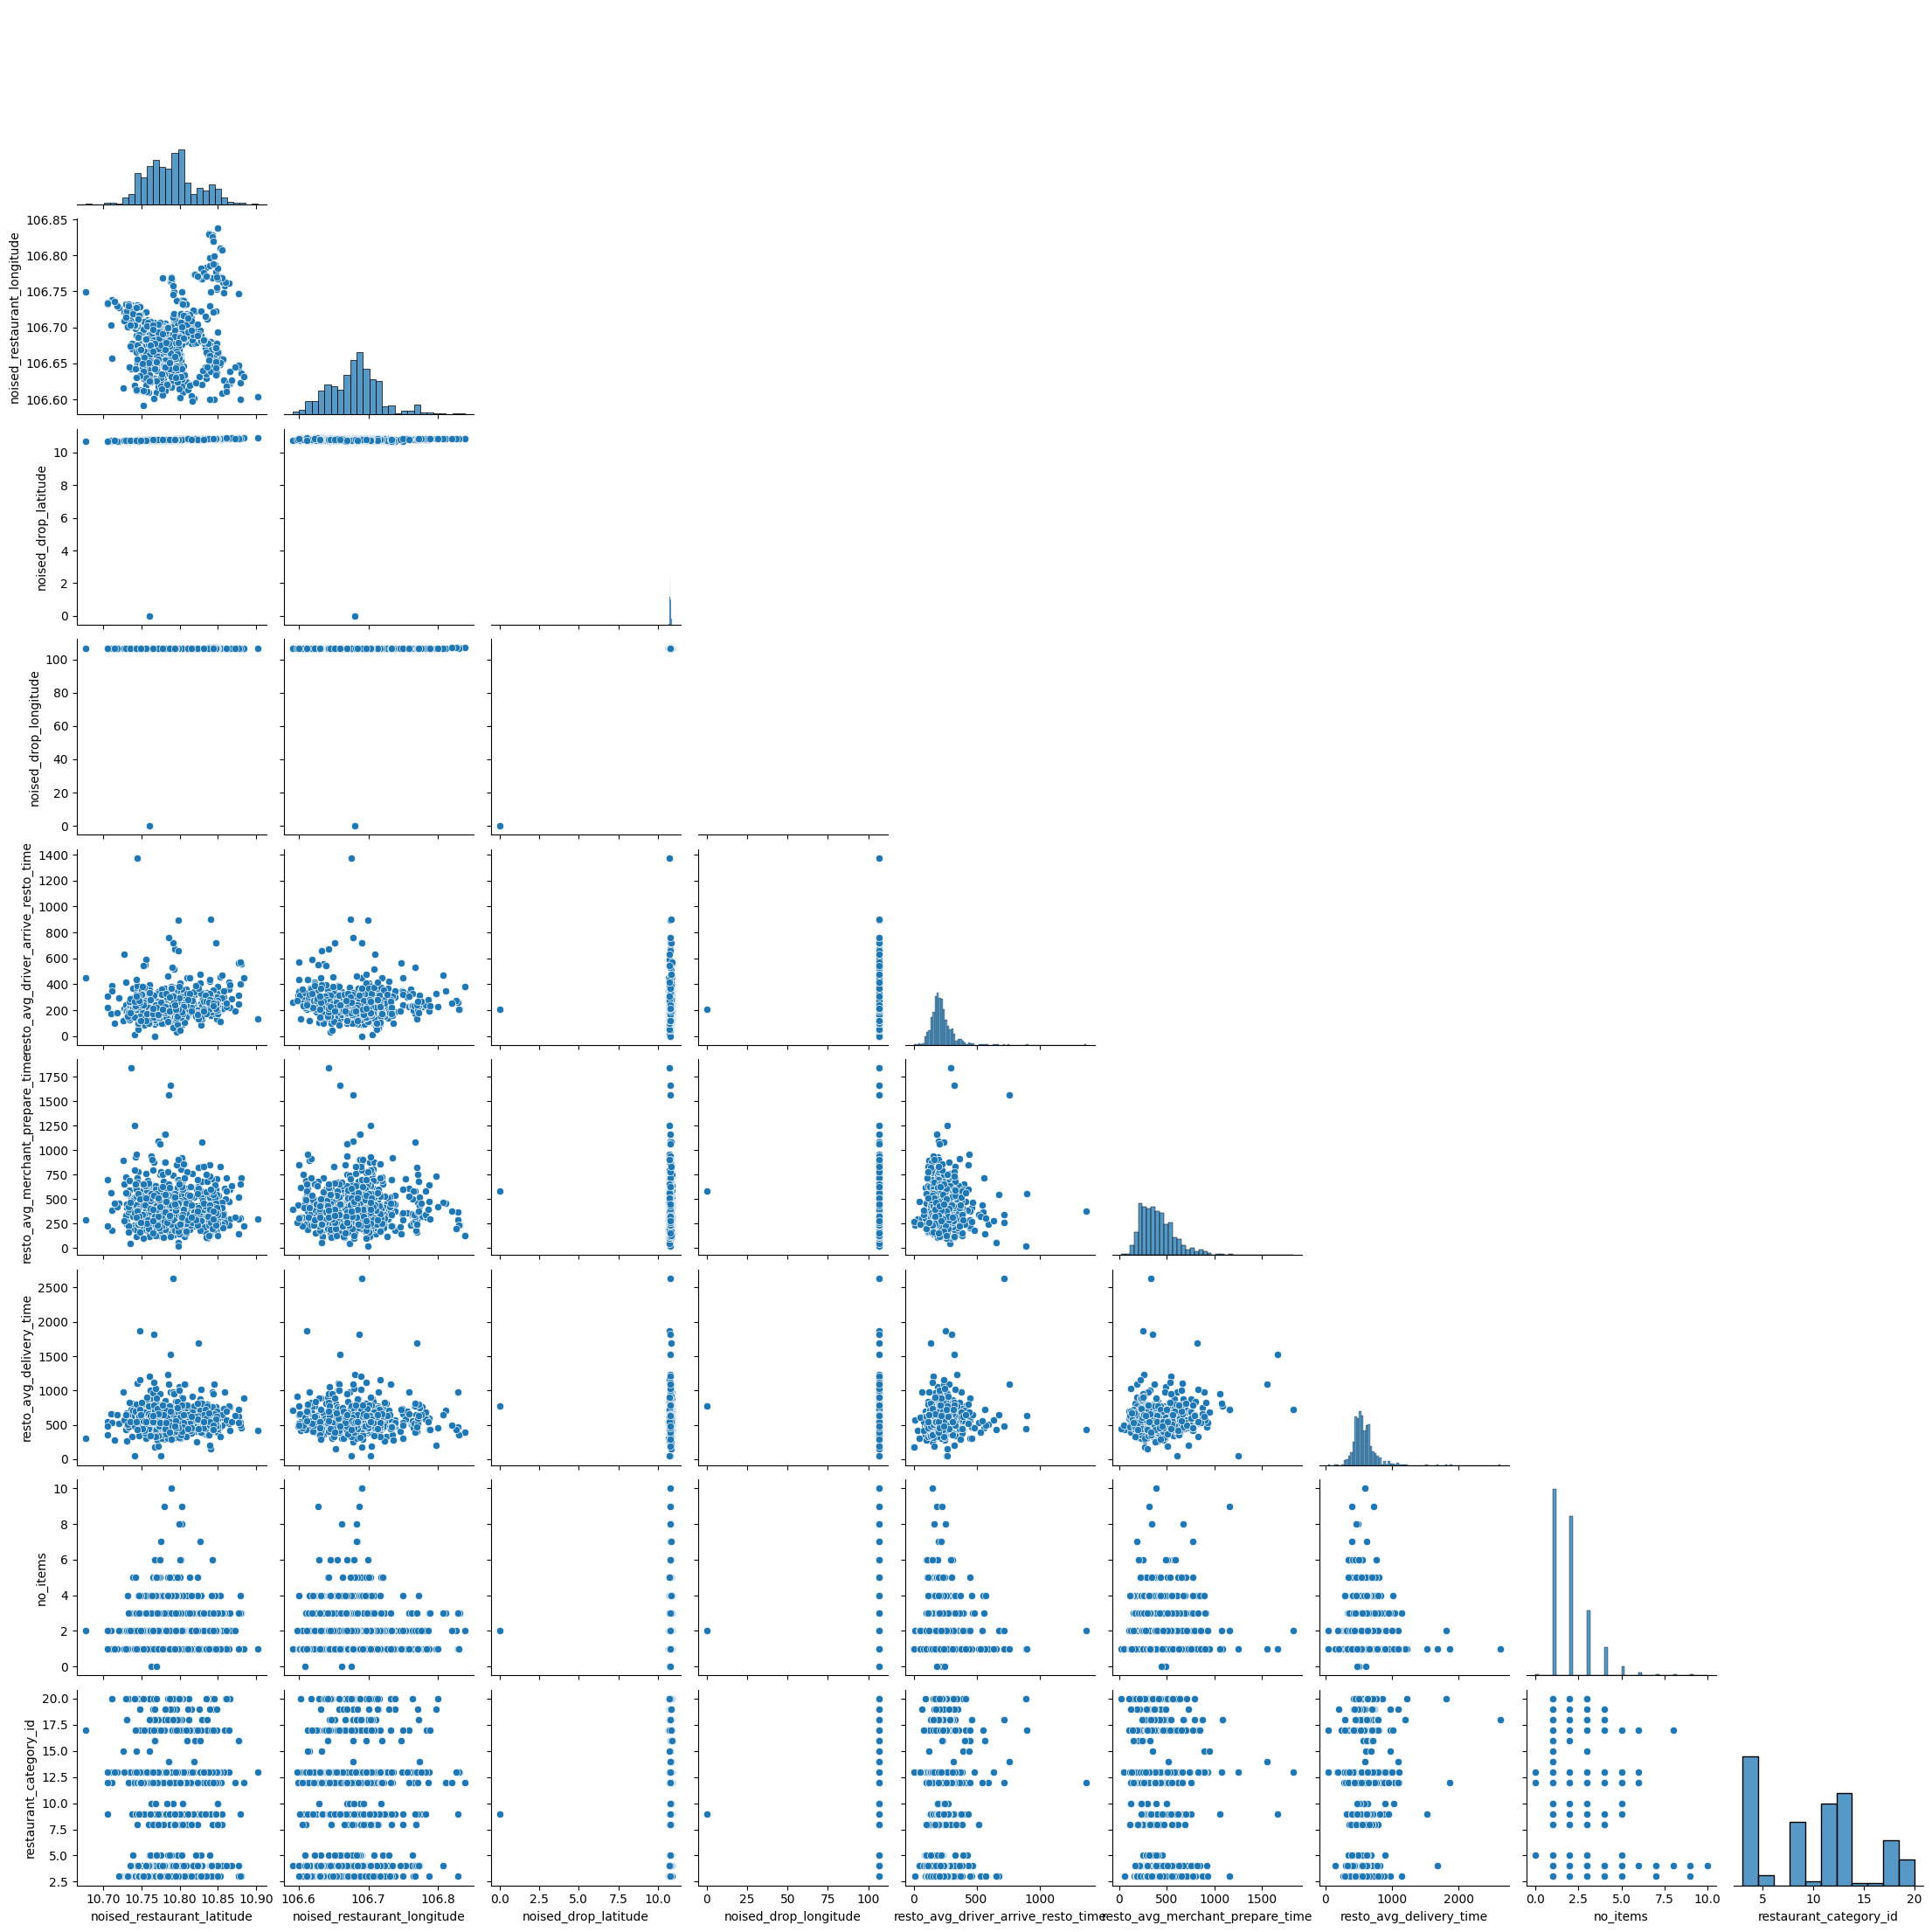

In [117]:
sns.pairplot(temp.sample(n=1000),corner=True)

## Feature Engineering

1. Add new features derived from original
- actual duration (as target) derived from `actual_time_arrival` and `order_created_at_time`
- distance derived from long and lat of resto and drop place
- estimated duration stem from 3 avg 
- avg time per item from `resto_avg_merchant_prepare_time` and `no_items`
- hour created derived from `order_created_from`
- is peak hour or not from hour created
- is Xday from weekday 

2. Exclude outliers

### Distance

In [118]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [119]:
from geopy.distance import geodesic

In [120]:
def calculate_distance(df):
    df['distance'] = np.zeros(len(df))
    resto_coor = df[['noised_restaurant_latitude','noised_restaurant_longitude']].to_numpy()
    drop_coor = df[['noised_drop_latitude','noised_drop_longitude']].to_numpy()
    # df['distance'] = np.array([geodesic(restaurant, delivery) for restaurant, delivery in zip(resto_coor, drop_coor)])
    # df['distance']= df['distance'].astype("str").str.extract('(\d+)').astype("int64")
        
    df['distance'] = [geodesic(restaurant, delivery).kilometers for restaurant, delivery in zip(resto_coor, drop_coor)]



calculate_distance(temp)
temp.head(3)

,week_day,order_created_at_time,restaurant_id_h,order_id_h,noised_restaurant_latitude,noised_restaurant_longitude,noised_drop_latitude,noised_drop_longitude,resto_avg_driver_arrive_resto_time,resto_avg_merchant_prepare_time,resto_avg_delivery_time,no_items,restaurant_category_id,actual_time_arrival,distance
0,Wednesday,00:03:01,f5882bd952cdb9e416a2c951d7f16935a755d9bf19fb5b...,92e4edf2207b9fd60fb9972a1bcd62d34d4b8e654f0963...,10.779663,106.604650,10.751649,106.609754,304.428571,520.857143,652.428571,2,15,00:28:13,3.148600
1,Wednesday,00:03:11,96abafeb1e03c584e9e66ddae730798c4ab63d8bcb8191...,6a2338d70aa87d482e5057e7ccc0646c5e21f12793e863...,10.798146,106.643499,10.808109,106.632191,254.941176,280.000000,420.941176,2,4,00:17:01,1.656457
2,Wednesday,00:04:12,c36562c53838cb8ed23e9de694b67c8f42ebd246ce5073...,8e700cfddfaf6b79989d7ddcdc91f10a739771a444b0a8...,10.796208,106.695271,10.791213,106.686658,220.390244,474.097561,497.658537,1,9,00:16:55,1.092011


In [121]:
temp['distance'].describe()

count    111536.000000
mean          5.839410
std         226.955801
min           0.003393
25%           0.745707
50%           1.294347
75%           1.963826
max       11849.308194
Name: distance, dtype: float64

(0.0, 25.0)

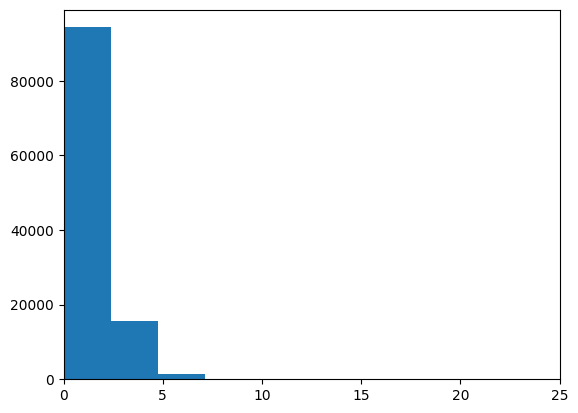

In [122]:
# See pattern of distance
plt.hist(temp['distance'], bins=5000)
plt.xlim(0,25)

In [123]:
# exclude distance >10 and <0.3
print(sum(temp['distance'] >10))
print(sum(temp['distance'] <0.3))
temp.drop(temp[temp['distance']>10].index,inplace=True)
temp.drop(temp[temp['distance'] <0.3].index,inplace=True)


83
7172


### Duration

In [124]:
# omit time <0
print(sum(temp['resto_avg_merchant_prepare_time'] <=0))
temp = temp[temp['resto_avg_merchant_prepare_time'] >0]


18


In [125]:
# actual_duration = ATA - time_created
temp['order_created_at_time'] = pd.to_datetime(temp['order_created_at_time'], format = '%H:%M:%S').dt.time
temp['actual_time_arrival'] = pd.to_datetime(temp['actual_time_arrival'], format = '%H:%M:%S').dt.time

temp['actual_duration'] = temp.apply(lambda row: (pd.to_datetime(row['actual_time_arrival'],format='%H:%M:%S') - pd.to_datetime(row['order_created_at_time'], format='%H:%M:%S')).seconds / 60, axis=1).astype(float)

temp = temp[temp['actual_time_arrival'] > temp['order_created_at_time']]

#exclude outliers deliver more than 3 hour
print(sum(temp['actual_duration'] > 60*3))
temp = temp[temp['actual_duration'] <= 60*3] #***


112


In [126]:
#change from sec to min
temp['resto_avg_delivery_time'] = temp['resto_avg_delivery_time']/60
temp['resto_avg_merchant_prepare_time'] = temp['resto_avg_merchant_prepare_time']/60
temp['resto_avg_driver_arrive_resto_time'] = temp['resto_avg_driver_arrive_resto_time']/60

# estimated_duration = sum avg
temp['estimated_total_duration'] = temp['resto_avg_delivery_time'] + temp['resto_avg_merchant_prepare_time'] + temp['resto_avg_driver_arrive_resto_time']

# gap
temp['gap'] = temp['estimated_total_duration'] - temp['actual_duration']



Figure(800x600) [<Axes: > <Axes: > <Axes: >]
count    103933.000000
mean          3.645732
std           1.427321
min           0.033333
50%           3.470238
90%           5.119048
max          54.483333
Name: resto_avg_driver_arrive_resto_time, dtype: float64
Figure(800x600) Axes(0.125,0.653529;0.775x0.226471)
count    103933.000000
mean          6.857599
std           3.255834
min           0.200000
50%           6.305000
90%          10.778723
max         118.216667
Name: resto_avg_merchant_prepare_time, dtype: float64
Figure(800x600) Axes(0.125,0.381765;0.775x0.226471)
count    103933.000000
mean          9.611336
std           3.168931
min           0.266667
50%           9.229630
90%          12.278571
max         161.777778
Name: resto_avg_delivery_time, dtype: float64
Figure(800x600) Axes(0.125,0.11;0.775x0.226471)


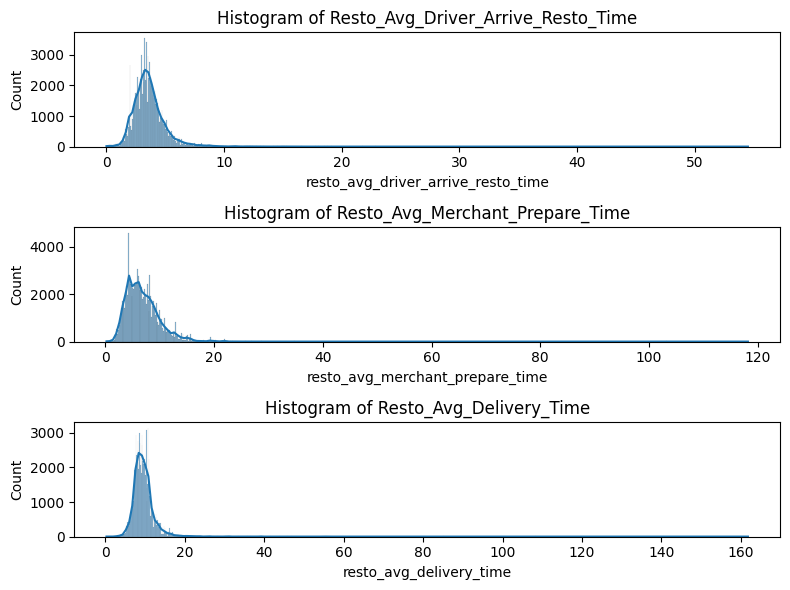

In [127]:
columns = ["resto_avg_driver_arrive_resto_time", "resto_avg_merchant_prepare_time", "resto_avg_delivery_time"]
data = temp

fig, ax = plt.subplots(len(columns), 1, figsize=(8, 6))  
print(fig, ax)

for col, ax in zip(columns, ax):
    print(temp[col].describe(percentiles=[0.9]))
    sns.histplot(data=data, x=col, ax=ax, kde=True) 
    ax.set_title(f"Histogram of {col.title()}")
    print(fig, ax)

plt.tight_layout()  
plt.show()

In [128]:
#exclude outliers 
print('- Before - ',f"resto_avg_delivery_time >30min: {sum(temp['resto_avg_delivery_time'] > 30)}\n"
      f"resto_avg_merchant_prepare_time >30min: {sum(temp['resto_avg_merchant_prepare_time'] > 30)}\n"
      f"resto_avg_driver_arrive_resto_time >10min: {sum(temp['resto_avg_driver_arrive_resto_time'] > 10)}")

temp = temp[temp['resto_avg_delivery_time'] <= 30] 
temp = temp[temp['resto_avg_merchant_prepare_time'] <= 30]
temp = temp[temp['resto_avg_driver_arrive_resto_time'] <= 10]

print('- After - ',f"resto_avg_delivery_time >30min: {sum(temp['resto_avg_delivery_time'] > 30)}\n"
      f"resto_avg_merchant_prepare_time >30min: {sum(temp['resto_avg_merchant_prepare_time'] > 30)}\n"
      f"resto_avg_driver_arrive_resto_time >10min: {sum(temp['resto_avg_driver_arrive_resto_time'] > 10)}")


- Before -  resto_avg_delivery_time >30min: 247
resto_avg_merchant_prepare_time >30min: 48
resto_avg_driver_arrive_resto_time >10min: 415
- After -  resto_avg_delivery_time >30min: 0
resto_avg_merchant_prepare_time >30min: 0
resto_avg_driver_arrive_resto_time >10min: 0


In [129]:
temp.head(3)

,week_day,order_created_at_time,restaurant_id_h,order_id_h,noised_restaurant_latitude,noised_restaurant_longitude,noised_drop_latitude,noised_drop_longitude,resto_avg_driver_arrive_resto_time,resto_avg_merchant_prepare_time,resto_avg_delivery_time,no_items,restaurant_category_id,actual_time_arrival,distance,actual_duration,estimated_total_duration,gap
0,Wednesday,00:03:01,f5882bd952cdb9e416a2c951d7f16935a755d9bf19fb5b...,92e4edf2207b9fd60fb9972a1bcd62d34d4b8e654f0963...,10.779663,106.604650,10.751649,106.609754,5.073810,8.680952,10.873810,2,15,00:28:13,3.148600,25.200000,24.628571,-0.571429
1,Wednesday,00:03:11,96abafeb1e03c584e9e66ddae730798c4ab63d8bcb8191...,6a2338d70aa87d482e5057e7ccc0646c5e21f12793e863...,10.798146,106.643499,10.808109,106.632191,4.249020,4.666667,7.015686,2,4,00:17:01,1.656457,13.833333,15.931373,2.098039
2,Wednesday,00:04:12,c36562c53838cb8ed23e9de694b67c8f42ebd246ce5073...,8e700cfddfaf6b79989d7ddcdc91f10a739771a444b0a8...,10.796208,106.695271,10.791213,106.686658,3.673171,7.901626,8.294309,1,9,00:16:55,1.092011,12.716667,19.869106,7.152439


### Weekday

In [130]:
# Encoding categorical into numerical
weekday_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

temp['week_day_code'] = temp['week_day'].map(weekday_mapping)
temp['is_weekend'] = np.where(temp['week_day_code'].isin([6,7]),1,0)

(0.0, 50000.0)

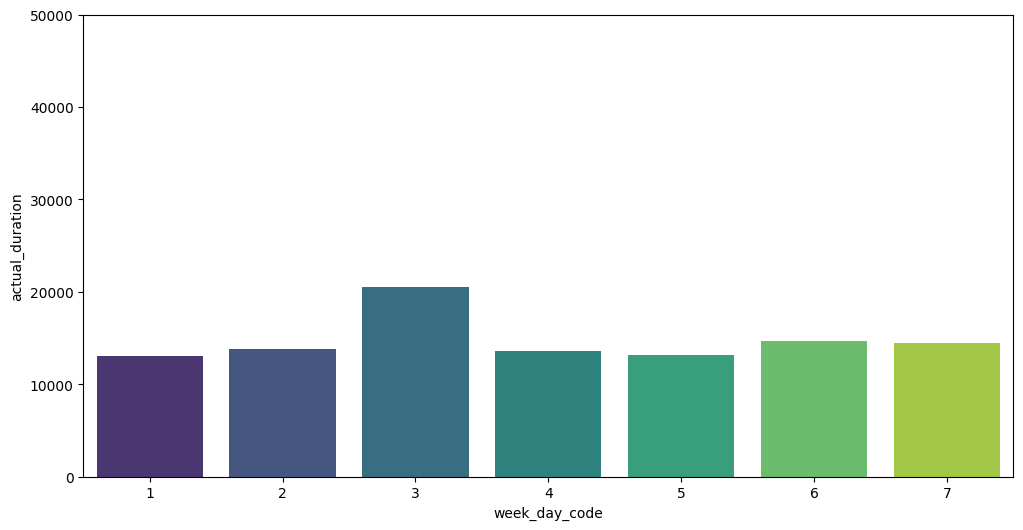

In [131]:
# See pattern of weekdays
plt.figure(figsize=(12, 6))
sns.barplot(x='week_day_code', y='actual_duration', 
            # hue='week_day_code', 
            data=temp.groupby(['week_day_code'])[['actual_duration']].count().reset_index(), palette='viridis').set_ylim(0,50000)



Wednesday seems to be the day with highest frequency, ~1.5 times on other days -> should set it as a new feature

In [132]:
temp['is_Wed'] = np.where(temp['week_day_code'] == 3,1,0)

### Hour

In [133]:
temp['hour_created'] = temp['order_created_at_time'].astype('str').str.split(':').str[0].astype('int')

<Axes: xlabel='hour_created', ylabel='actual_duration'>

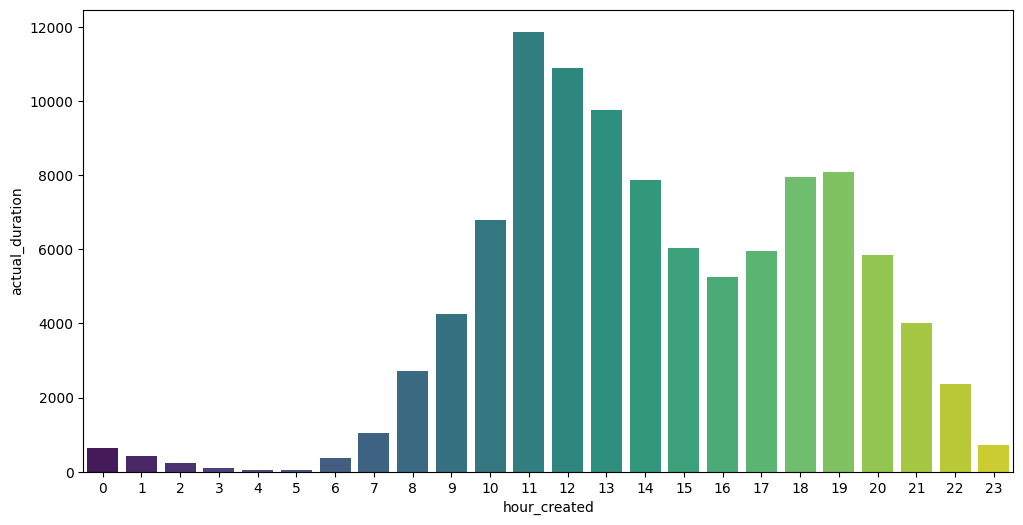

In [134]:
# See pattern of hour
plt.figure(figsize=(12, 6))
sns.barplot(x='hour_created', y='actual_duration', 
            # hue='week_day_code', 
            data=temp.groupby(['hour_created'])[['actual_duration']].count().reset_index(), palette='viridis')


Users often order in the afternoon more than other time of day.

Lunch and dinner time often has higher frequency

In [135]:
temp['is_peak_hour'] = np.where(temp['hour_created'].isin([11,12,13,18,19]),1,0)

### Time per item

<Axes: xlabel='no_items', ylabel='actual_duration'>

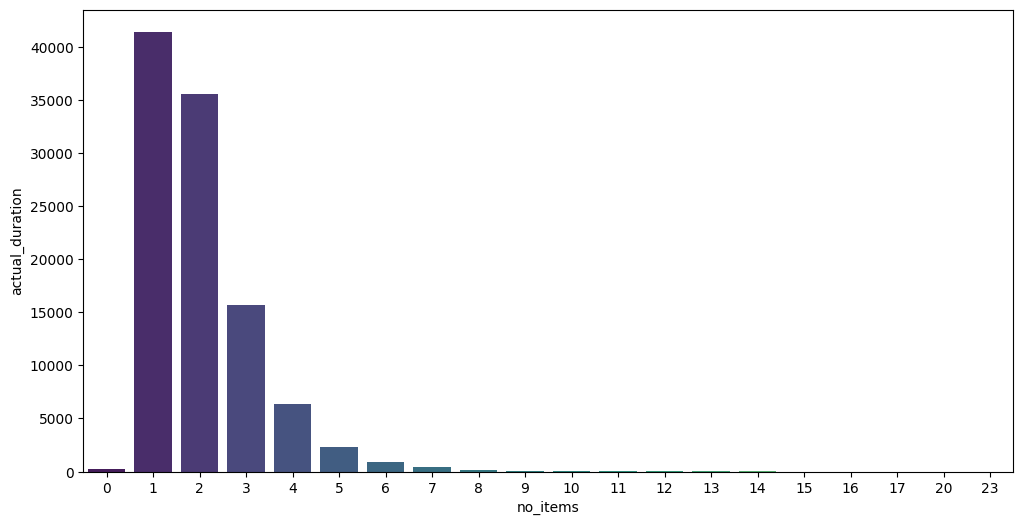

In [136]:
# See pattern of items
plt.figure(figsize=(12, 6))
sns.barplot(x='no_items', y='actual_duration', 
            # hue='week_day_code', 
            data=temp.groupby(['no_items'])[['actual_duration']].count().reset_index(), palette='viridis')


In [137]:
# drop no_items = 0
temp = temp[temp['no_items'] >0]

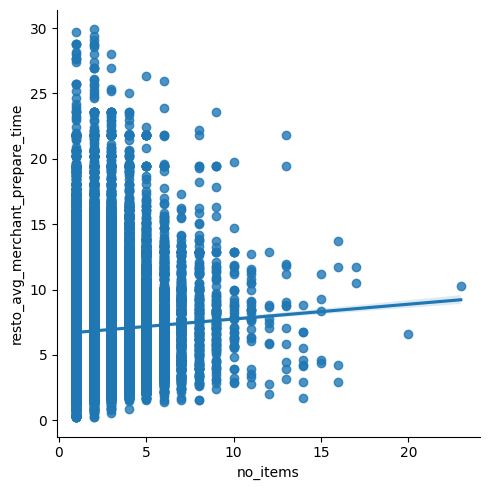

In [138]:
sns.lmplot(temp,x='no_items',y='resto_avg_merchant_prepare_time')

In [139]:
temp['avg_per_item'] = temp['resto_avg_merchant_prepare_time']/temp['no_items']

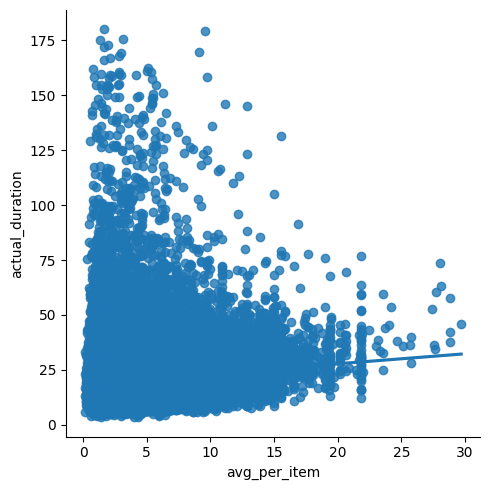

In [140]:
sns.lmplot(temp,x='avg_per_item',y='actual_duration')

___

# More explorations

In [141]:
temp.columns

Index(['week_day', 'order_created_at_time', 'restaurant_id_h', 'order_id_h',
       'noised_restaurant_latitude', 'noised_restaurant_longitude',
       'noised_drop_latitude', 'noised_drop_longitude',
       'resto_avg_driver_arrive_resto_time', 'resto_avg_merchant_prepare_time',
       'resto_avg_delivery_time', 'no_items', 'restaurant_category_id',
       'actual_time_arrival', 'distance', 'actual_duration',
       'estimated_total_duration', 'gap', 'week_day_code', 'is_weekend',
       'is_Wed', 'hour_created', 'is_peak_hour', 'avg_per_item'],
      dtype='object')

In [142]:
### Clustering locations

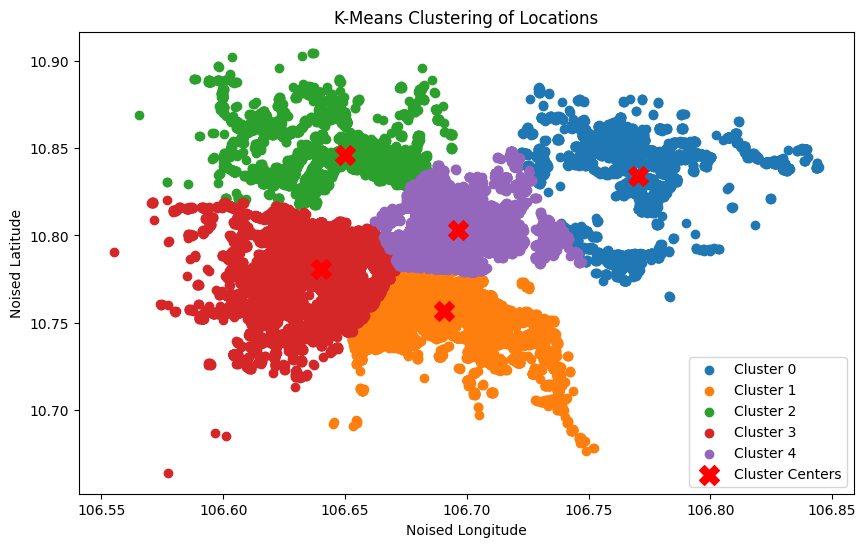

In [143]:
# Restaurant locations
from sklearn.cluster import KMeans

# Specify the number of clusters 
num_clusters = 5

# Create a KMeans instance
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

temp['restaurant_cluster_no'] = kmeans.fit_predict(temp[['noised_restaurant_latitude', 'noised_restaurant_longitude']])

# Plot the clustered locations
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = temp[temp['restaurant_cluster_no'] == cluster]
    plt.scatter(cluster_data['noised_restaurant_longitude'], cluster_data['noised_restaurant_latitude'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=200, c='red', marker='X', label='Cluster Centers')
plt.title('K-Means Clustering of Locations')
plt.xlabel('Noised Longitude')
plt.ylabel('Noised Latitude')
plt.legend()
plt.show()


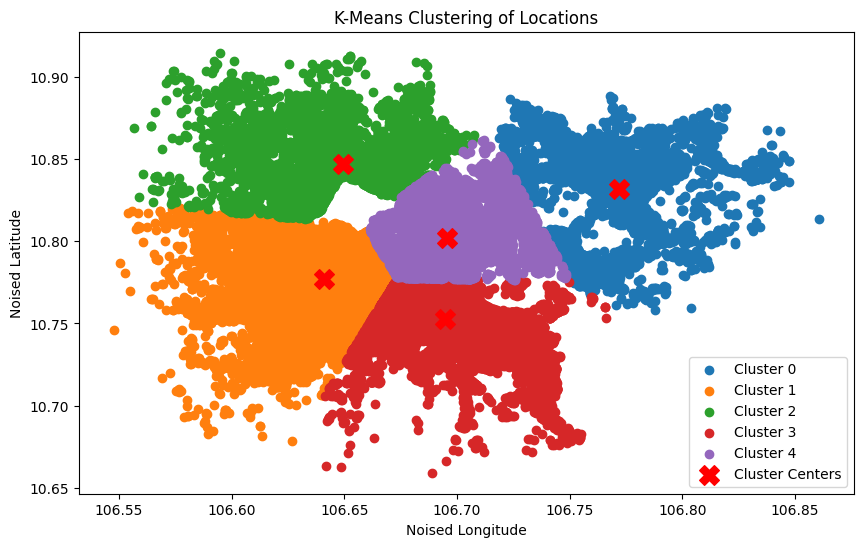

In [144]:
# Drop locations

# Specify the number of clusters 
num_clusters = 5

# Create a KMeans instance
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

temp['drop_cluster_no'] = kmeans.fit_predict(temp[['noised_drop_latitude', 'noised_drop_longitude']])

# Plot the clustered locations
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = temp[temp['drop_cluster_no'] == cluster]
    plt.scatter(cluster_data['noised_drop_longitude'], cluster_data['noised_drop_latitude'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=200, c='red', marker='X', label='Cluster Centers')
plt.title('K-Means Clustering of Locations')
plt.xlabel('Noised Longitude')
plt.ylabel('Noised Latitude')
plt.legend()
plt.show()


In [145]:
#replace no of cluster in 'drop' to match with 'resto' 
temp['drop_cluster_no'].replace({1:3,3:1}, inplace=True)

In [146]:
#drop long and lat outliers
temp = temp[(temp['noised_restaurant_latitude'] < 10.9 )
      &
      (temp['noised_restaurant_latitude'] >10.7)
      &
      (temp['noised_drop_latitude'] <10.9)
      &
      (temp['noised_drop_latitude'] >10.7)
]

In [147]:
temp

,week_day,order_created_at_time,restaurant_id_h,order_id_h,noised_restaurant_latitude,noised_restaurant_longitude,noised_drop_latitude,noised_drop_longitude,resto_avg_driver_arrive_resto_time,resto_avg_merchant_prepare_time,...,estimated_total_duration,gap,week_day_code,is_weekend,is_Wed,hour_created,is_peak_hour,avg_per_item,restaurant_cluster_no,drop_cluster_no
0,Wednesday,00:03:01,f5882bd952cdb9e416a2c951d7f16935a755d9bf19fb5b...,92e4edf2207b9fd60fb9972a1bcd62d34d4b8e654f0963...,10.779663,106.604650,10.751649,106.609754,5.073810,8.680952,...,24.628571,-0.571429,3,0,1,0,0,4.340476,3,3
1,Wednesday,00:03:11,96abafeb1e03c584e9e66ddae730798c4ab63d8bcb8191...,6a2338d70aa87d482e5057e7ccc0646c5e21f12793e863...,10.798146,106.643499,10.808109,106.632191,4.249020,4.666667,...,15.931373,2.098039,3,0,1,0,0,2.333333,3,3
2,Wednesday,00:04:12,c36562c53838cb8ed23e9de694b67c8f42ebd246ce5073...,8e700cfddfaf6b79989d7ddcdc91f10a739771a444b0a8...,10.796208,106.695271,10.791213,106.686658,3.673171,7.901626,...,19.869106,7.152439,3,0,1,0,0,7.901626,4,4
3,Wednesday,00:04:20,d096e644f8596611ff65c5b07aed9f9d17c2ec3158edc6...,70319476604a22c258c394d9b8c879d6d32d511bd2b402...,10.753824,106.683894,10.760239,106.668003,3.357407,4.648457,...,17.725000,4.358333,3,0,1,0,0,4.648457,1,1
4,Wednesday,00:06:57,3f8de1592f374f220e4be4456c7c0ec226729af98e99ec...,77e06752127e561d37876418b65159ec9aaa1ad4f86453...,10.796606,106.704031,10.789168,106.714135,3.550000,9.154762,...,23.940476,2.340476,3,0,1,0,0,9.154762,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111241,Wednesday,15:36:48,3233ea5c2c8d327f878f39d1a6d8ec0221af2dbaaf56fa...,63ab7c7b56bdf114e741fa6f39003521e8ffb1e94457b5...,10.773946,106.649867,10.769204,106.660503,3.598810,3.636905,...,15.313095,5.496429,3,0,1,15,0,3.636905,3,3
111242,Wednesday,15:36:57,c748e1f68ec1975d4a240fbfb56ebd8fc1364c96aa7d0f...,f175d1307d960b86ed7cd0e7a9cbcfb2f66b2f70e79375...,10.772744,106.686614,10.766306,106.686775,3.816667,11.683333,...,28.361111,10.277778,3,0,1,15,0,11.683333,1,1
111243,Wednesday,15:37:00,59fb1763d17ba5016047b73d7f2e81357e6d103569a2d0...,f9909ab9a8001f92df57217a6ab109dc5ff5d63c179494...,10.786121,106.687883,10.765934,106.667216,3.312982,6.981754,...,18.828421,-3.754912,3,0,1,15,0,2.327251,4,3
111244,Wednesday,15:37:03,71574e147fa152ed7ba1f4464f114d8d2824153b8c04d1...,df6d99b1a91768ea96cd8e53d1089941d8fb6abeb3c25a...,10.802454,106.739965,10.799265,106.739238,2.840000,9.116667,...,19.160000,-10.356667,3,0,1,15,0,9.116667,4,4


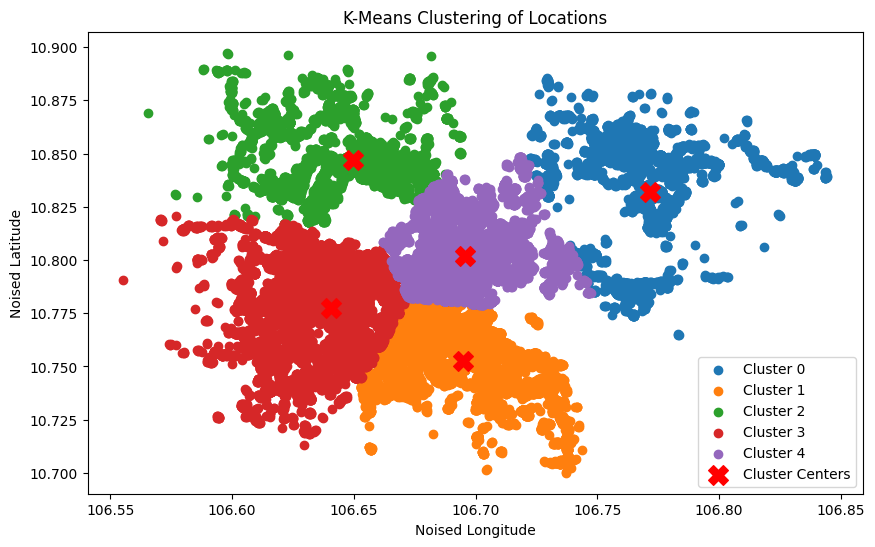

In [148]:
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = temp[temp['restaurant_cluster_no'] == cluster]
    plt.scatter(cluster_data['noised_restaurant_longitude'], cluster_data['noised_restaurant_latitude'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=200, c='red', marker='X', label='Cluster Centers')
plt.title('K-Means Clustering of Locations')
plt.xlabel('Noised Longitude')
plt.ylabel('Noised Latitude')
plt.legend()
plt.show()


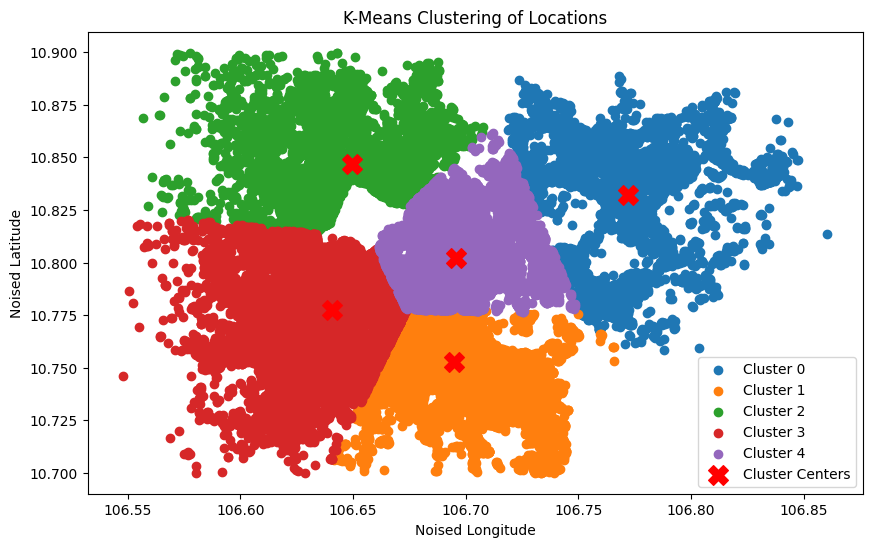

In [149]:
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = temp[temp['drop_cluster_no'] == cluster]
    plt.scatter(cluster_data['noised_drop_longitude'], cluster_data['noised_drop_latitude'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=200, c='red', marker='X', label='Cluster Centers')
plt.title('K-Means Clustering of Locations')
plt.xlabel('Noised Longitude')
plt.ylabel('Noised Latitude')
plt.legend()
plt.show()

In [150]:
print(f"{sum(temp['restaurant_cluster_no'] == temp['drop_cluster_no'])/temp.shape[0]*100}% of orders pick the restaurant in the same cluster as their location")

84.70239777078442% of orders pick the restaurant in the same cluster as their location


In [151]:
# Create new feature for same cluster
temp['is_same_cluster'] = np.where(temp['restaurant_cluster_no'] == temp['drop_cluster_no'],1,0)
temp.head(2)

,week_day,order_created_at_time,restaurant_id_h,order_id_h,noised_restaurant_latitude,noised_restaurant_longitude,noised_drop_latitude,noised_drop_longitude,resto_avg_driver_arrive_resto_time,resto_avg_merchant_prepare_time,...,gap,week_day_code,is_weekend,is_Wed,hour_created,is_peak_hour,avg_per_item,restaurant_cluster_no,drop_cluster_no,is_same_cluster
0,Wednesday,00:03:01,f5882bd952cdb9e416a2c951d7f16935a755d9bf19fb5b...,92e4edf2207b9fd60fb9972a1bcd62d34d4b8e654f0963...,10.779663,106.604650,10.751649,106.609754,5.07381,8.680952,...,-0.571429,3,0,1,0,0,4.340476,3,3,1
1,Wednesday,00:03:11,96abafeb1e03c584e9e66ddae730798c4ab63d8bcb8191...,6a2338d70aa87d482e5057e7ccc0646c5e21f12793e863...,10.798146,106.643499,10.808109,106.632191,4.24902,4.666667,...,2.098039,3,0,1,0,0,2.333333,3,3,1


In [152]:
# temp.to_csv('temp.csv')

In [153]:
df_train = temp.drop(columns = ['week_day','order_created_at_time', 'restaurant_id_h', 'order_id_h','actual_time_arrival','gap'
    #                             'resto_avg_driver_arrive_resto_time', 'resto_avg_merchant_prepare_time',
    #    'resto_avg_delivery_time',
                                # 'estimated_total_duration',
                                # 'restaurant_category_id',
    #                             'noised_restaurant_latitude', 'noised_restaurant_longitude',
    #    'noised_drop_latitude', 'noised_drop_longitude',
       ])

<Axes: >

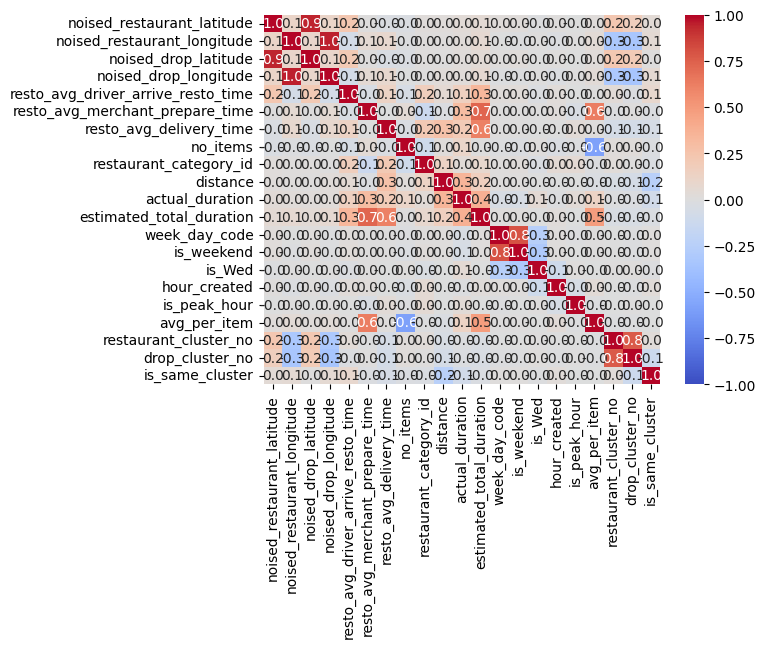

In [154]:
# Correlation matrix return all the correlation btw each col in a df 
corr_train = df_train.corr(numeric_only=True) # to only consider numeric columns in df
sns.heatmap(corr_train, annot=True,vmin=-1,vmax=1,cmap='coolwarm', fmt='.1f') #put it into heatmap for easier interpretation

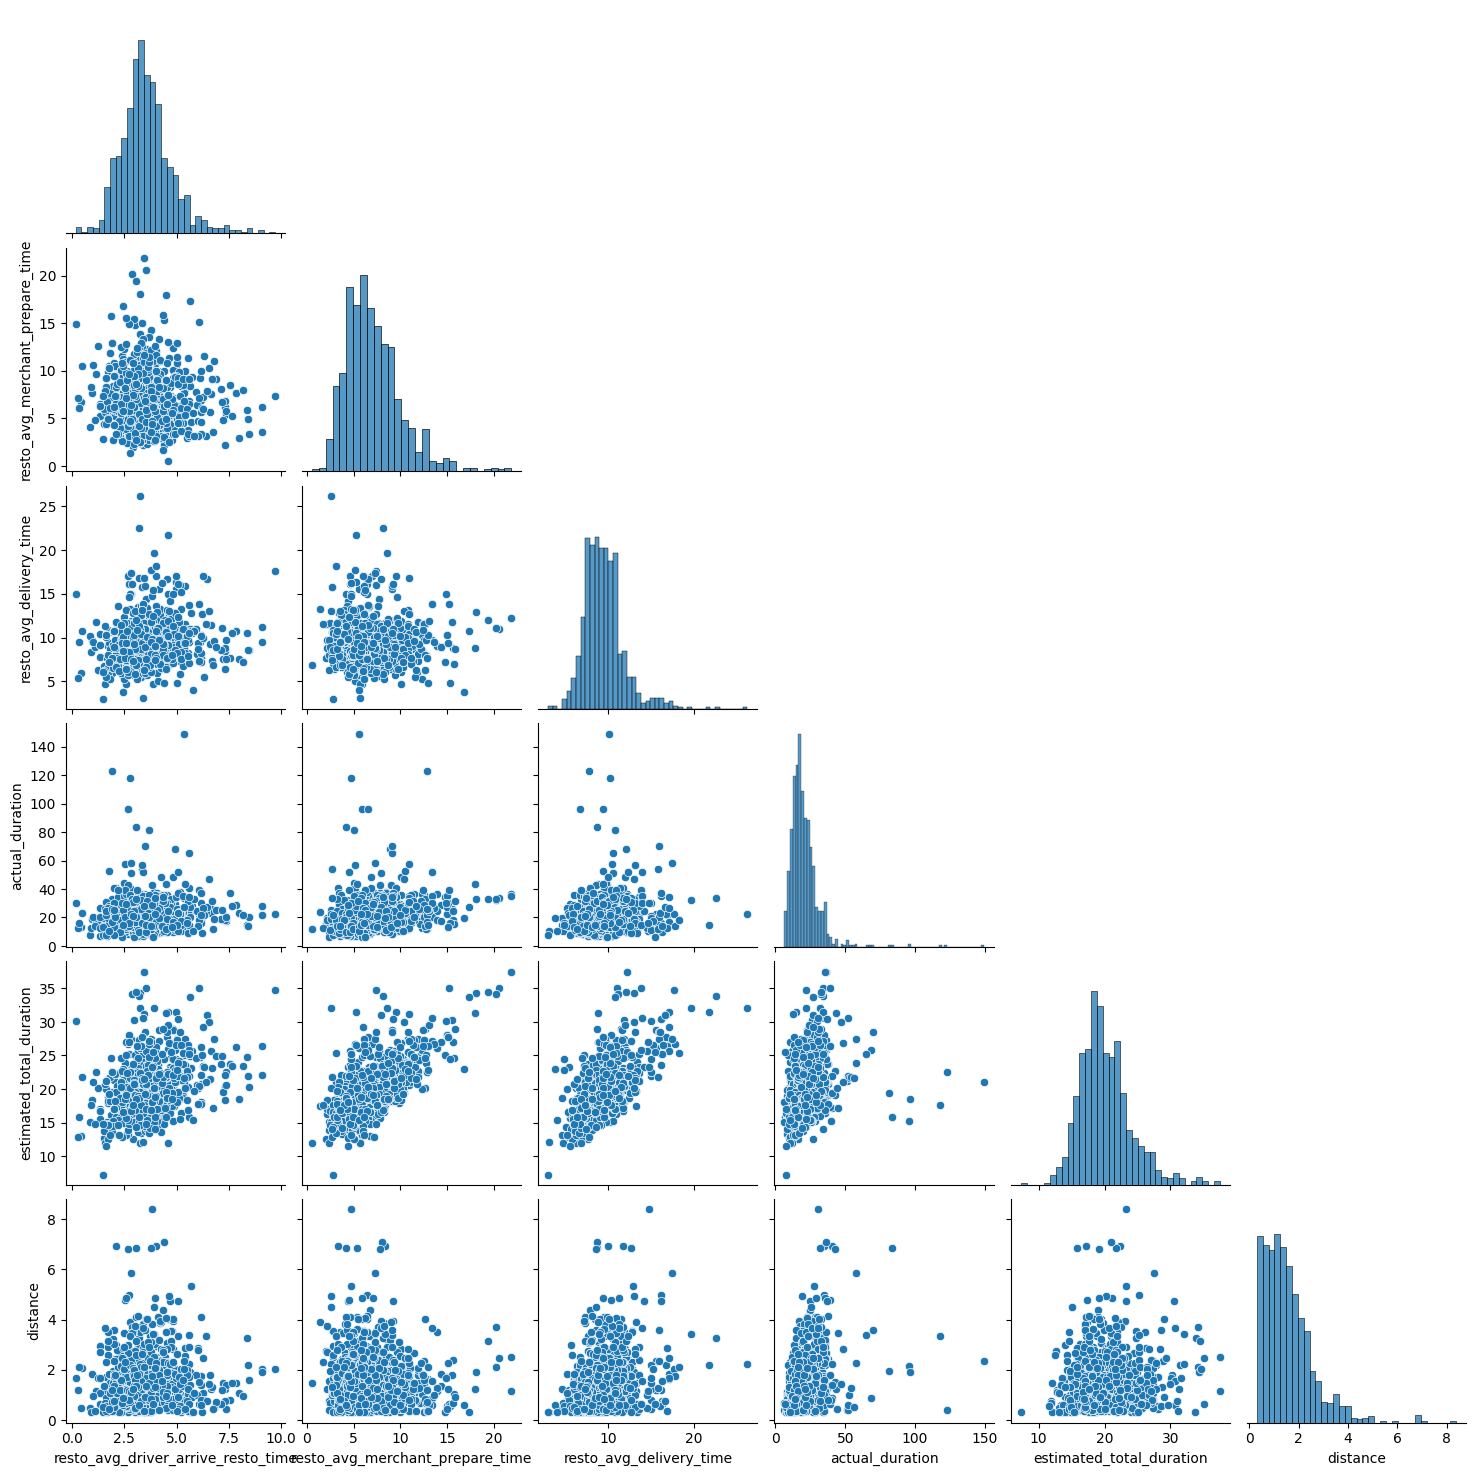

In [155]:
sns.pairplot(df_train[['resto_avg_driver_arrive_resto_time', 'resto_avg_merchant_prepare_time',
       'resto_avg_delivery_time','actual_duration',
       'estimated_total_duration','distance']].sample(n=1000),corner=True)

In [156]:
df_train['actual_duration'] = round(df_train['actual_duration'],0)

Orders between 0-6h are often delivered slower although has fewer order. 

Especially on weekend.

<Axes: xlabel='hour_created', ylabel='resto_avg_driver_arrive_resto_time'>

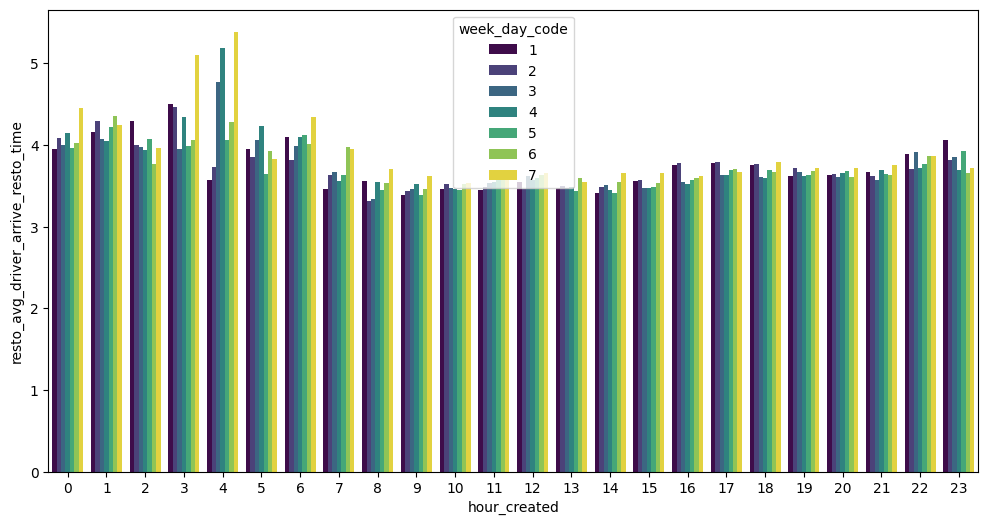

In [157]:
plt.figure(figsize=(12, 6))
sns.barplot(x='hour_created', y='resto_avg_driver_arrive_resto_time', hue='week_day_code', data=df_train.groupby(['hour_created','week_day_code'])[['resto_avg_driver_arrive_resto_time']].mean().reset_index(), palette='viridis')


<Axes: xlabel='hour_created', ylabel='resto_avg_driver_arrive_resto_time'>

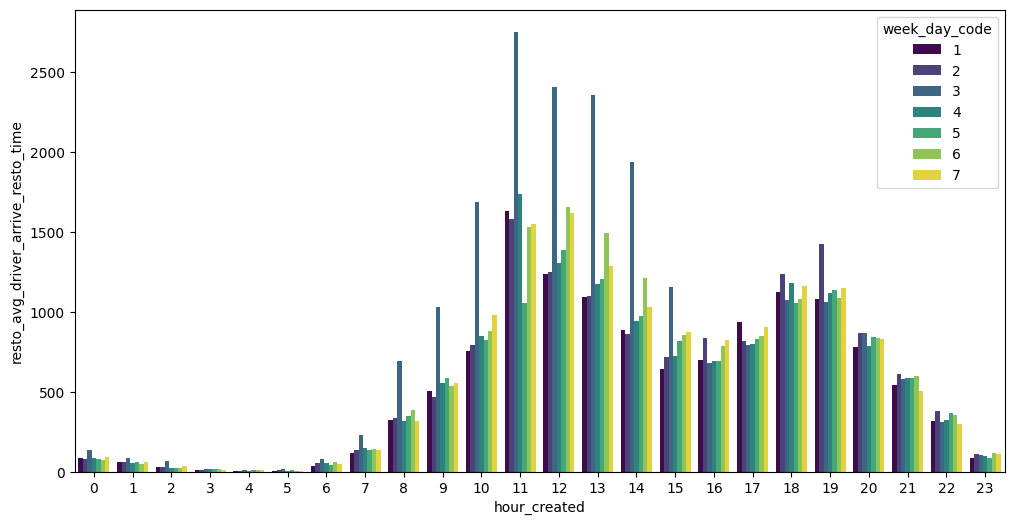

In [158]:
plt.figure(figsize=(12, 6))
sns.barplot(x='hour_created', y='resto_avg_driver_arrive_resto_time', hue='week_day_code', data=df_train.groupby(['week_day_code', 'hour_created'])[['resto_avg_driver_arrive_resto_time']].count().reset_index(), palette='viridis')


<Axes: xlabel='hour_created', ylabel='resto_avg_driver_arrive_resto_time'>

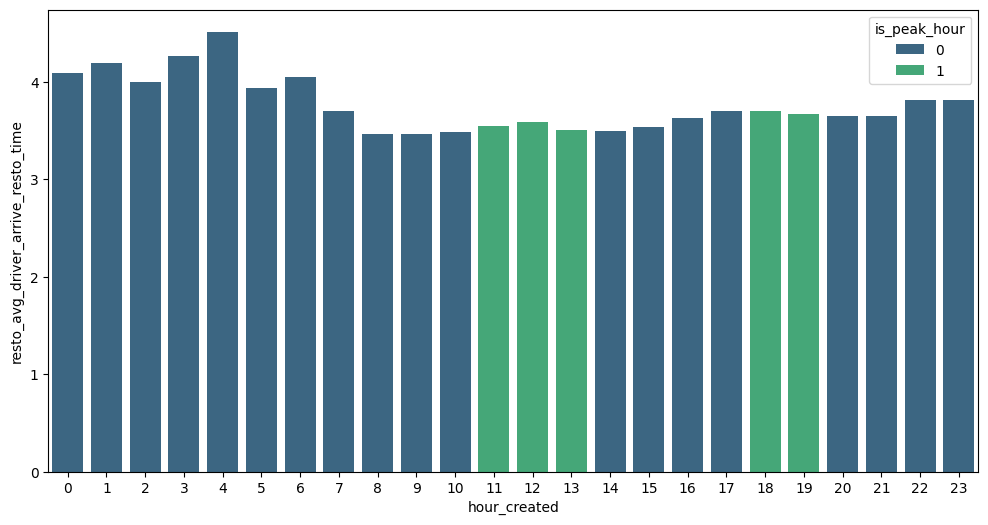

In [159]:
plt.figure(figsize=(12, 6))
sns.barplot(x='hour_created', y='resto_avg_driver_arrive_resto_time', hue='is_peak_hour', data=df_train.groupby(['hour_created', 'is_peak_hour'])[['resto_avg_driver_arrive_resto_time']].mean().reset_index(), palette='viridis')


Time preparation varies between restaurant categories. Restaurants in cate 14, 15 has preparation time length = 2 times other cates

<Axes: xlabel='restaurant_category_id', ylabel='resto_avg_merchant_prepare_time'>

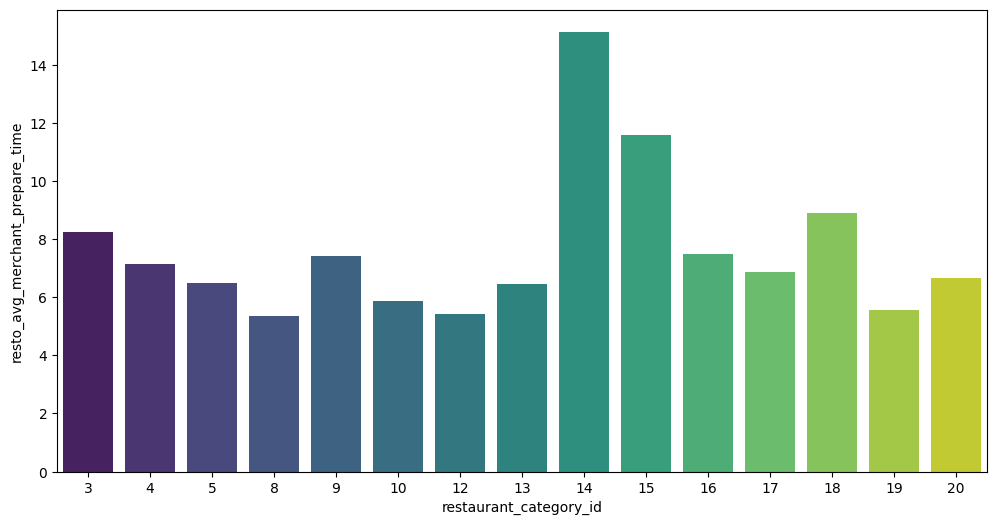

In [160]:
plt.figure(figsize=(12, 6))
sns.barplot(x='restaurant_category_id', y='resto_avg_merchant_prepare_time', 
            # hue='restaurant_category_id', 
            data=df_train.groupby(['restaurant_category_id'])[['resto_avg_merchant_prepare_time']].mean().reset_index(), 
            palette='viridis')


Distance will impact duration more significant at the first 5km

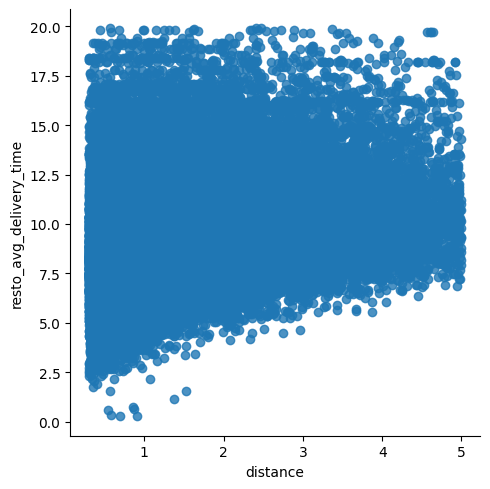

In [161]:
f=df_train[(df_train['distance']<5) & (df_train['resto_avg_delivery_time']<20)]
sns.lmplot(f,x='distance',y='resto_avg_delivery_time', 
           )

In [162]:
f['distance'].corr(f['resto_avg_delivery_time'])


0.26153644416775745

In [163]:
temp.describe()

,noised_restaurant_latitude,noised_restaurant_longitude,noised_drop_latitude,noised_drop_longitude,resto_avg_driver_arrive_resto_time,resto_avg_merchant_prepare_time,resto_avg_delivery_time,no_items,restaurant_category_id,distance,...,gap,week_day_code,is_weekend,is_Wed,hour_created,is_peak_hour,avg_per_item,restaurant_cluster_no,drop_cluster_no,is_same_cluster
count,102637.000000,102637.000000,102637.000000,102637.000000,102637.000000,102637.000000,102637.000000,102637.000000,102637.000000,102637.000000,...,102637.000000,102637.000000,102637.000000,102637.000000,102637.000000,102637.000000,102637.000000,102637.000000,102637.000000,102637.000000
mean,10.788391,106.682019,10.788117,106.682423,3.599028,6.837321,9.516347,2.023150,10.306011,1.561284,...,-0.751502,3.990754,0.282773,0.196333,14.322593,0.471399,4.396168,2.337520,2.423346,0.847024
std,0.032983,0.037965,0.034909,0.040044,1.223660,3.034214,2.367006,1.209596,5.140677,0.994695,...,9.525184,1.956975,0.450349,0.397225,4.193683,0.499184,2.913127,1.357067,1.353467,0.359966
min,10.700077,106.555216,10.700051,106.547832,0.033333,0.233333,0.266667,1.000000,3.000000,0.300098,...,-158.500556,1.000000,0.000000,0.000000,0.000000,0.000000,0.116667,0.000000,0.000000,0.000000
25%,10.763371,106.657882,10.762972,106.657837,2.803070,4.553030,8.024242,1.000000,4.000000,0.847187,...,-3.712500,2.000000,0.000000,0.000000,11.000000,0.000000,2.210294,1.000000,1.000000,1.000000
50%,10.787690,106.682482,10.786364,106.682071,3.461111,6.305556,9.224242,2.000000,12.000000,1.363254,...,0.658156,4.000000,0.000000,0.000000,14.000000,0.000000,3.656522,3.000000,3.000000,1.000000
75%,10.806117,106.702467,10.808395,106.703536,4.185897,8.412901,10.669697,3.000000,13.000000,2.010704,...,4.408025,6.000000,1.000000,0.000000,18.000000,1.000000,5.850000,4.000000,4.000000,1.000000
max,10.897392,106.844476,10.899745,106.860500,9.996667,29.900000,29.155556,23.000000,20.000000,9.919388,...,34.415385,7.000000,1.000000,1.000000,23.000000,1.000000,29.700000,4.000000,4.000000,1.000000


In [164]:
# df_train.to_csv('df_train.csv')

---

# Train test split 

In [165]:
# Split features and label 
X = df_train.drop('actual_duration',axis = 1)
y = df_train['actual_duration']

# Split data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(82109, 20)
(82109,)
(20528, 20)
(20528,)


# Standardization

In [166]:
# Create a StandardScaler Object 
scaler = StandardScaler()

# Fit the scaler on the training data 
scaler.fit(X_train)

# Perform standardization on the training data
X_train = scaler.transform(X_train)

# Perform standardization on the testing data 
X_test = scaler.transform(X_test)

### Steps
1. Employ cross-validation & hyper parameter tuning to determine the optimal regression model.
2. Construct the food delivery prediction model using the identified best model.
3. Evaluate the model's performance on the testing data to assess its accuracy and reliability.

In [167]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have X_train, X_test, y_train, and y_test already defined

# Find the best model
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    xgb.XGBRegressor(),
]

param_grid = [
    {}, 
    {'max_depth': [5, 7, 9]},
    {'n_estimators': [70,80,90], 'max_depth': [1,3,5]},
]

best_models = []

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=20, scoring='r2')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print()

# Make predictions on the test data for each best model
predictions = []
for model in best_models:
    y_pred = model.predict(X_test)
    predictions.append(pd.Series(y_pred, name=f'{model.__class__.__name__}_predicted'))

# Create a DataFrame with actual and predicted values
result_df = pd.concat([pd.Series(y_test, name='Actual')] + predictions, axis=1)
# print(result_df.head())


LinearRegression:
Best parameters: {}
Best R2 score: 0.2583370629030865

DecisionTreeRegressor:
Best parameters: {'max_depth': 5}
Best R2 score: 0.21260751745828607

XGBRegressor:
Best parameters: {'max_depth': 5, 'n_estimators': 70}
Best R2 score: 0.3115244213046097



In [168]:
# Create a XGB regressor model
model = xgb.XGBRegressor(n_estimators=30,max_depth=9)

# Fit the model on the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=30, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Model Evaluation

In [169]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))

Mean Absolute Error (MAE): 5.21
Mean Squared Error (MSE): 77.43
Root Mean Squared Error (RMSE): 8.8
R-squared (R2) Score: 0.27


In [170]:
result_df

,Actual,LinearRegression_predicted,DecisionTreeRegressor_predicted,XGBRegressor_predicted
109448,18.0,NaN,NaN,NaN
73793,19.0,NaN,NaN,NaN
87248,17.0,NaN,NaN,NaN
81190,21.0,NaN,NaN,NaN
18750,8.0,18.030773,17.806191,18.544373
...,...,...,...,...
20522,NaN,14.161416,15.288000,15.208212
20523,NaN,18.076870,17.806191,27.414597
20524,NaN,23.995369,23.825162,24.451355
20526,NaN,18.681706,17.806191,29.767275


In [171]:
# result_df.to_excel('result_df.xlsx', index=False)

In [172]:
# Assuming original_df is your original DataFrame
new_df = df_train.copy()

# Add columns for actual and predicted values
new_df['Actual'] = result_df['Actual']  # Assuming 'Actual' is the column name in result_df
for prediction_column in result_df.columns[1:]:  # Exclude the 'Actual' column
    new_df[prediction_column] = result_df[prediction_column]

# Now, new_df will have columns for actual and predicted values
new_df.head()


,noised_restaurant_latitude,noised_restaurant_longitude,noised_drop_latitude,noised_drop_longitude,resto_avg_driver_arrive_resto_time,resto_avg_merchant_prepare_time,resto_avg_delivery_time,no_items,restaurant_category_id,distance,...,hour_created,is_peak_hour,avg_per_item,restaurant_cluster_no,drop_cluster_no,is_same_cluster,Actual,LinearRegression_predicted,DecisionTreeRegressor_predicted,XGBRegressor_predicted
0,10.779663,106.604650,10.751649,106.609754,5.073810,8.680952,10.873810,2,15,3.148600,...,0,0,4.340476,3,3,1,NaN,21.931537,20.262291,21.044685
1,10.798146,106.643499,10.808109,106.632191,4.249020,4.666667,7.015686,2,4,1.656457,...,0,0,2.333333,3,3,1,NaN,19.799750,19.170578,19.145599
2,10.796208,106.695271,10.791213,106.686658,3.673171,7.901626,8.294309,1,9,1.092011,...,0,0,7.901626,4,4,1,NaN,14.392278,15.288000,12.723045
3,10.753824,106.683894,10.760239,106.668003,3.357407,4.648457,9.719136,1,12,1.877297,...,0,0,4.648457,1,1,1,NaN,18.586518,17.806191,19.084381
4,10.796606,106.704031,10.789168,106.714135,3.550000,9.154762,11.235714,1,17,1.377733,...,0,0,9.154762,4,4,1,NaN,16.782816,16.609410,15.767981


In [173]:
# new_df.to_excel('new_df.xlsx', index=False)

In [174]:
test_df = new_df.dropna()

In [175]:
threshold = 5

# Calculate the absolute error between actual and predicted values
test_df['absolute_error'] = abs(test_df['actual_duration'] - test_df['XGBRegressor_predicted'])

# Count the number of predictions within the threshold
within_threshold = test_df[test_df['absolute_error'] <= threshold].shape[0]

# Calculate the percentage of predictions within the threshold
accuracy_percentage = (within_threshold / test_df.shape[0]) * 100

print(f"Accuracy percentage within {threshold} units: {accuracy_percentage:.2f}%")

Accuracy percentage within 5 units: 40.27%


(0.0, 142.6599310398102)

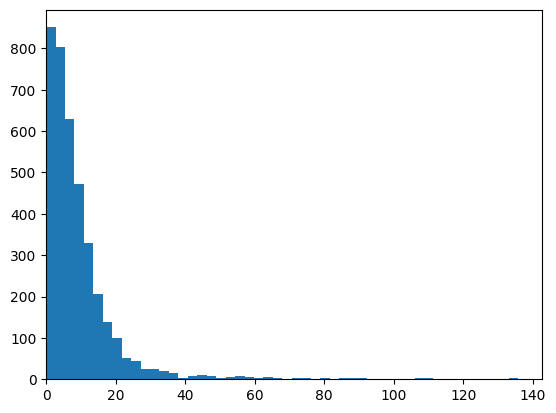

In [176]:
plt.hist(test_df['absolute_error'], bins=50)
plt.xlim(0,)

In [177]:
gap_df = new_df.copy()
gap_df['gap'] = gap_df['actual_duration'] - gap_df['XGBRegressor_predicted']

(array([1.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 3.000e+00, 5.000e+00, 6.000e+00, 4.000e+00,
        5.000e+00, 1.100e+01, 2.200e+01, 2.800e+01, 3.900e+01, 5.600e+01,
        9.900e+01, 1.370e+02, 2.360e+02, 3.590e+02, 5.560e+02, 8.500e+02,
        1.160e+03, 1.499e+03, 1.852e+03, 2.019e+03, 1.885e+03, 1.658e+03,
        1.366e+03, 1.061e+03, 8.080e+02, 6.650e+02, 4.740e+02, 3.490e+02,
        2.880e+02, 2.160e+02, 1.930e+02, 1.300e+02, 8.700e+01, 7.800e+01,
        6.500e+01, 6.100e+01, 4.700e+01, 3.600e+01, 2.700e+01, 3.300e+01,
        2.700e+01, 2.300e+01, 2.300e+01, 2.000e+01, 1.700e+01, 2.200e+01,
        2.100e+01, 1.100e+01, 1.400e+01, 1.500e+01, 1.600e+01, 5.000e+00,
        1.000e+01, 1.300e+01, 7.000e+00, 4.000e+00, 1.200e+01, 2.000e+00,
        6.000e+00, 4.000e+00, 5.000e+00, 4.000e+00, 4.000e+00, 5.000e+00,
        4.000e+00, 1.000e+00, 3.000e+00, 6.000e+00, 3.000e+00, 5.000e+00,
        4.000e+00, 3.000e+00, 0.000e+0

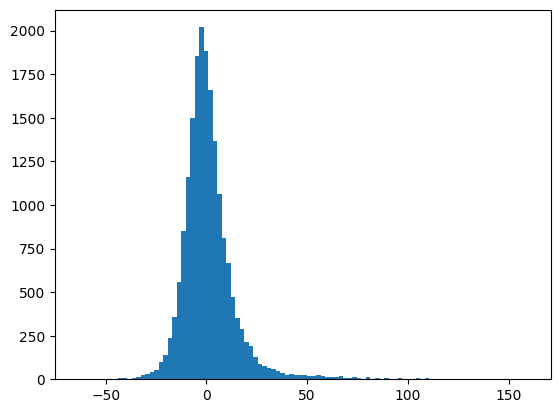

In [178]:
plt.hist(gap_df['gap'], bins=100)
# plt.xlim(-50,50)

In [179]:
gap_df.dropna()

,noised_restaurant_latitude,noised_restaurant_longitude,noised_drop_latitude,noised_drop_longitude,resto_avg_driver_arrive_resto_time,resto_avg_merchant_prepare_time,resto_avg_delivery_time,no_items,restaurant_category_id,distance,...,is_peak_hour,avg_per_item,restaurant_cluster_no,drop_cluster_no,is_same_cluster,Actual,LinearRegression_predicted,DecisionTreeRegressor_predicted,XGBRegressor_predicted,gap
6,10.763064,106.666591,10.765804,106.666113,1.966667,11.866667,4.600000,3,9,0.307558,...,0,3.955556,1,3,0,18.0,18.962852,19.752694,17.563242,0.436758
13,10.802805,106.710579,10.791749,106.722273,4.074444,3.411389,8.860833,3,13,1.769517,...,0,1.137130,4,4,1,21.0,24.914385,21.189896,22.845089,-1.845089
14,10.815946,106.682473,10.761448,106.681689,4.844444,12.646296,11.500926,2,4,6.028826,...,0,6.323148,4,1,0,33.0,23.329007,25.133816,21.518761,11.481239
25,10.743900,106.715771,10.747473,106.714346,3.193333,8.095000,8.723333,1,17,0.424857,...,0,8.095000,1,1,1,11.0,19.693304,21.641022,21.601290,-10.601290
26,10.747979,106.667764,10.729506,106.671773,1.679487,6.298718,7.434615,4,13,2.089878,...,0,1.574679,1,1,1,24.0,22.456153,19.170578,25.674162,-1.674162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20500,10.834199,106.670187,10.843691,106.682617,4.465404,4.462879,8.194444,4,20,1.717512,...,1,1.115720,2,2,1,20.0,22.662564,23.825162,21.023645,-1.023645
20505,10.801333,106.657490,10.807650,106.645295,3.323984,4.316260,8.012602,2,13,1.505677,...,1,2.158130,3,3,1,14.0,19.312843,17.806191,16.996761,-2.996761
20509,10.760137,106.680255,10.773812,106.683814,1.697588,5.742763,7.675000,1,12,1.562000,...,1,5.742763,1,1,1,18.0,13.790760,13.148216,12.616931,5.383069
20519,10.823956,106.688098,10.829347,106.696659,2.916107,3.911007,9.444279,3,12,1.109943,...,1,1.303669,4,4,1,8.0,30.402015,26.944543,30.405334,-22.405334


Best xmin: -7
Best xmax: 3


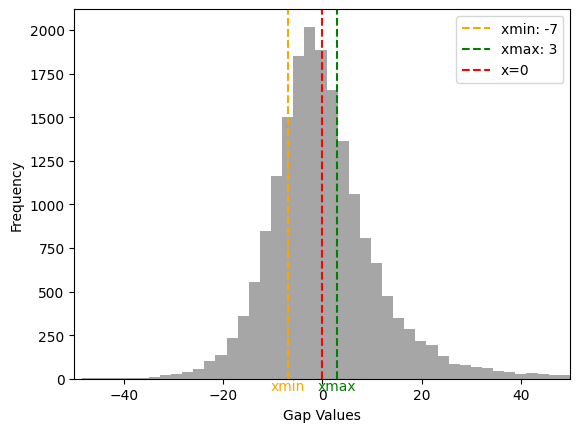

In [180]:
# Find the maximum area between two points xmin and xmax
max_area = 0
best_xmin = None
best_xmax = None

for xmin in range(int(gap_df['gap'].min()), int(gap_df['gap'].max()) - 9):
    xmax = xmin + 10
    area = sum((gap_df['gap'] >= xmin) & (gap_df['gap'] <= xmax))

    if area > max_area:
        max_area = area
        best_xmin = xmin
        best_xmax = xmax

# Print xmin, xmax
print("Best xmin:", best_xmin)
print("Best xmax:", best_xmax)

# Plot the histogram
plt.hist(gap_df['gap'], bins=100, alpha=0.7, color='grey')

# Draw lines for xmin and xmax
plt.axvline(x=best_xmin, color='orange', linestyle='--', label=f'xmin: {best_xmin}')
plt.axvline(x=best_xmax, color='green', linestyle='--', label=f'xmax: {best_xmax}')
plt.axvline(x=0, color='red', linestyle='--', label='x=0')

# Add labels and legend
plt.xlabel('Gap Values')
plt.ylabel('Frequency')
plt.legend()

# Add annotations on the horizontal axis
plt.annotate(f'xmin', xy=(best_xmin, 0), xytext=(best_xmin, -5),
                 ha='center', va='top', color='orange')
plt.annotate(f'xmax', xy=(best_xmax, 0), xytext=(best_xmax, -5),
                 ha='center', va='top', color='green')
plt.xlim(-50,50)

# Show the plot
plt.show()


In [181]:
threshold_left = -7
threshold_right = 3

# Calculate the absolute error between actual and predicted values
test_df['absolute_error'] = (test_df['actual_duration'] - test_df['XGBRegressor_predicted'])

# Count the number of predictions within the threshold
within_threshold = test_df[
    (test_df['absolute_error'] >= threshold_left) & 
    (test_df['absolute_error'] <= threshold_right)
].shape[0]

# Calculate the percentage of predictions within the threshold
accuracy_percentage = (within_threshold / test_df.shape[0]) * 100

print(f"Accuracy percentage within [{threshold_left}, {threshold_right}] units: {accuracy_percentage:.2f}%")


Accuracy percentage within [-7, 3] units: 41.72%


In [182]:
wrong_df = test_df[test_df['absolute_error']>10]
wrong_df.head()

,noised_restaurant_latitude,noised_restaurant_longitude,noised_drop_latitude,noised_drop_longitude,resto_avg_driver_arrive_resto_time,resto_avg_merchant_prepare_time,resto_avg_delivery_time,no_items,restaurant_category_id,distance,...,is_peak_hour,avg_per_item,restaurant_cluster_no,drop_cluster_no,is_same_cluster,Actual,LinearRegression_predicted,DecisionTreeRegressor_predicted,XGBRegressor_predicted,absolute_error
14,10.815946,106.682473,10.761448,106.681689,4.844444,12.646296,11.500926,2,4,6.028826,...,0,6.323148,4,1,0,33.0,23.329007,25.133816,21.518761,11.481239
56,10.769479,106.663512,10.714068,106.619152,4.359000,10.273000,10.109333,1,13,7.817318,...,0,10.273000,3,3,1,33.0,11.342597,15.288000,11.845147,21.154853
117,10.795607,106.735906,10.800516,106.805027,3.526667,12.395000,11.330000,2,3,7.578576,...,0,6.197500,4,0,0,32.0,16.959233,16.609410,16.343502,15.656498
122,10.844565,106.646003,10.815255,106.608208,4.126190,10.314286,9.826190,1,17,5.252805,...,0,10.314286,2,3,0,31.0,14.993935,16.609410,16.212099,14.787901
123,10.769430,106.689772,10.734854,106.702376,2.286607,8.434821,9.683036,3,18,4.065510,...,0,2.811607,1,1,1,32.0,15.128726,19.170578,15.697392,16.302608


In [183]:
test_df.columns

Index(['noised_restaurant_latitude', 'noised_restaurant_longitude',
       'noised_drop_latitude', 'noised_drop_longitude',
       'resto_avg_driver_arrive_resto_time', 'resto_avg_merchant_prepare_time',
       'resto_avg_delivery_time', 'no_items', 'restaurant_category_id',
       'distance', 'actual_duration', 'estimated_total_duration',
       'week_day_code', 'is_weekend', 'is_Wed', 'hour_created', 'is_peak_hour',
       'avg_per_item', 'restaurant_cluster_no', 'drop_cluster_no',
       'is_same_cluster', 'Actual', 'LinearRegression_predicted',
       'DecisionTreeRegressor_predicted', 'XGBRegressor_predicted',
       'absolute_error'],
      dtype='object')

(0.0, 159.69999999999996)

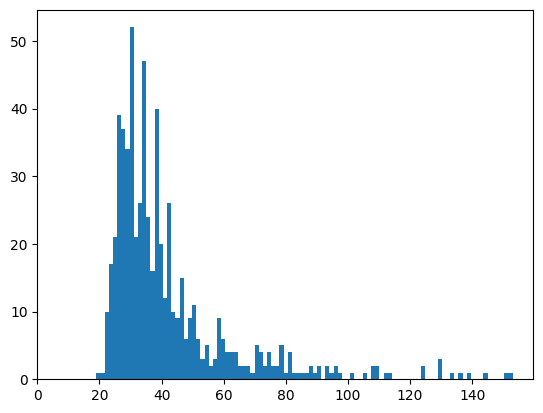

In [184]:
plt.hist(wrong_df['actual_duration'], bins=100)
plt.xlim(0,)

In [185]:
# sns.pairplot(wrong_df.sample(n=1000),corner=True)

# calculate normal avg if not predict

In [186]:
temp

,week_day,order_created_at_time,restaurant_id_h,order_id_h,noised_restaurant_latitude,noised_restaurant_longitude,noised_drop_latitude,noised_drop_longitude,resto_avg_driver_arrive_resto_time,resto_avg_merchant_prepare_time,...,gap,week_day_code,is_weekend,is_Wed,hour_created,is_peak_hour,avg_per_item,restaurant_cluster_no,drop_cluster_no,is_same_cluster
0,Wednesday,00:03:01,f5882bd952cdb9e416a2c951d7f16935a755d9bf19fb5b...,92e4edf2207b9fd60fb9972a1bcd62d34d4b8e654f0963...,10.779663,106.604650,10.751649,106.609754,5.073810,8.680952,...,-0.571429,3,0,1,0,0,4.340476,3,3,1
1,Wednesday,00:03:11,96abafeb1e03c584e9e66ddae730798c4ab63d8bcb8191...,6a2338d70aa87d482e5057e7ccc0646c5e21f12793e863...,10.798146,106.643499,10.808109,106.632191,4.249020,4.666667,...,2.098039,3,0,1,0,0,2.333333,3,3,1
2,Wednesday,00:04:12,c36562c53838cb8ed23e9de694b67c8f42ebd246ce5073...,8e700cfddfaf6b79989d7ddcdc91f10a739771a444b0a8...,10.796208,106.695271,10.791213,106.686658,3.673171,7.901626,...,7.152439,3,0,1,0,0,7.901626,4,4,1
3,Wednesday,00:04:20,d096e644f8596611ff65c5b07aed9f9d17c2ec3158edc6...,70319476604a22c258c394d9b8c879d6d32d511bd2b402...,10.753824,106.683894,10.760239,106.668003,3.357407,4.648457,...,4.358333,3,0,1,0,0,4.648457,1,1,1
4,Wednesday,00:06:57,3f8de1592f374f220e4be4456c7c0ec226729af98e99ec...,77e06752127e561d37876418b65159ec9aaa1ad4f86453...,10.796606,106.704031,10.789168,106.714135,3.550000,9.154762,...,2.340476,3,0,1,0,0,9.154762,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111241,Wednesday,15:36:48,3233ea5c2c8d327f878f39d1a6d8ec0221af2dbaaf56fa...,63ab7c7b56bdf114e741fa6f39003521e8ffb1e94457b5...,10.773946,106.649867,10.769204,106.660503,3.598810,3.636905,...,5.496429,3,0,1,15,0,3.636905,3,3,1
111242,Wednesday,15:36:57,c748e1f68ec1975d4a240fbfb56ebd8fc1364c96aa7d0f...,f175d1307d960b86ed7cd0e7a9cbcfb2f66b2f70e79375...,10.772744,106.686614,10.766306,106.686775,3.816667,11.683333,...,10.277778,3,0,1,15,0,11.683333,1,1,1
111243,Wednesday,15:37:00,59fb1763d17ba5016047b73d7f2e81357e6d103569a2d0...,f9909ab9a8001f92df57217a6ab109dc5ff5d63c179494...,10.786121,106.687883,10.765934,106.667216,3.312982,6.981754,...,-3.754912,3,0,1,15,0,2.327251,4,3,0
111244,Wednesday,15:37:03,71574e147fa152ed7ba1f4464f114d8d2824153b8c04d1...,df6d99b1a91768ea96cd8e53d1089941d8fb6abeb3c25a...,10.802454,106.739965,10.799265,106.739238,2.840000,9.116667,...,-10.356667,3,0,1,15,0,9.116667,4,4,1


Best xmin: -3
Best xmax: 7


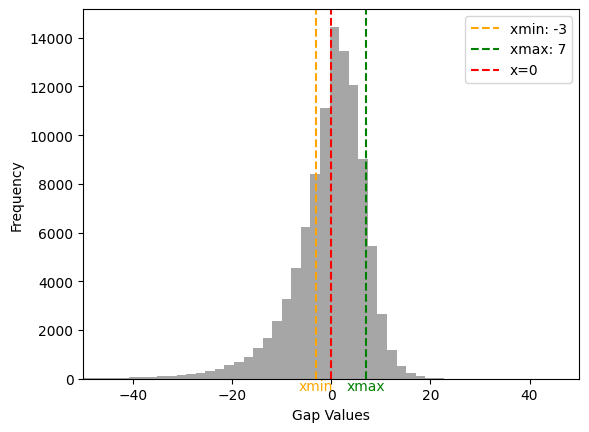

In [187]:

# Assuming you have already created the temp and plotted the histogram

# Find the maximum area between two points xmin and xmax
max_area = 0
best_xmin = None
best_xmax = None

for xmin in range(int(temp['gap'].min()), int(temp['gap'].max()) - 9):
    xmax = xmin + 10
    area = sum((temp['gap'] >= xmin) & (temp['gap'] <= xmax))

    if area > max_area:
        max_area = area
        best_xmin = xmin
        best_xmax = xmax

# Print xmin, xmax
print("Best xmin:", best_xmin)
print("Best xmax:", best_xmax)

# Plot the histogram
plt.hist(temp['gap'], bins=100, alpha=0.7, color='grey')

# Draw lines for xmin and xmax
plt.axvline(x=best_xmin, color='orange', linestyle='--', label=f'xmin: {best_xmin}')
plt.axvline(x=best_xmax, color='green', linestyle='--', label=f'xmax: {best_xmax}')
plt.axvline(x=0, color='red', linestyle='--', label='x=0')

# Add labels and legend
plt.xlabel('Gap Values')
plt.ylabel('Frequency')
plt.legend()

# Add annotations on the horizontal axis
plt.annotate(f'xmin', xy=(best_xmin, 0), xytext=(best_xmin, -5),
                 ha='center', va='top', color='orange')
plt.annotate(f'xmax', xy=(best_xmax, 0), xytext=(best_xmax, -5),
                 ha='center', va='top', color='green')
plt.xlim(-50,50)

# Show the plot
plt.show()


In [188]:
threshold_left = -3
threshold_right = 7

# Calculate the absolute error between actual and predicted values
temp['absolute_error'] = (temp['actual_duration'] - temp['estimated_total_duration'])

# Count the number of predictions within the threshold
within_threshold = temp[
    (temp['absolute_error'] >= threshold_left) & 
    (temp['absolute_error'] <= threshold_right)
].shape[0]

# Calculate the percentage of predictions within the threshold
accuracy_percentage = (within_threshold / temp.shape[0]) * 100

print(f"Accuracy percentage within [{threshold_left}, {threshold_right}] units: {accuracy_percentage:.2f}%")


Accuracy percentage within [-3, 7] units: 50.83%
